In [ ]:
pip install gensim


Word2vec conversion

In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np

# Sample sentences
sentences = [
    "The cat sat on the mat.",
    "The dog sat on the log.",
    "The cat chased the mouse.",
    "The dog barked at the stranger.",
    "A man is eating food.",
    "A woman is eating pizza.",
    "A man is playing guitar.",
    "A woman is dancing."
]

# Preprocess the sentences
sentences = [sentence.lower().split() for sentence in sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Convert sentences to vectors by averaging word vectors
def sentence_to_vector(sentence, model):
    words = sentence
    vector = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    return vector

sentence_vectors = np.array([sentence_to_vector(sentence, word2vec_model) for sentence in sentences])


Jaccard similarity


In [ ]:
def jaccard_similarity(str1, str2):
    a = set(str1)
    b = set(str2)
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

jaccard_sim_matrix = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    for j in range(len(sentences)):
        jaccard_sim_matrix[i, j] = jaccard_similarity(sentences[i], sentences[j])
print("Jaccard Similarity Matrix:")
print(jaccard_sim_matrix)


Jaccard Similarity Matrix:
[[1.         0.42857143 0.28571429 0.11111111 0.         0.
  0.         0.        ]
 [0.42857143 1.         0.125      0.25       0.         0.
  0.         0.        ]
 [0.28571429 0.125      1.         0.125      0.         0.
  0.         0.        ]
 [0.11111111 0.25       0.125      1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.42857143
  0.42857143 0.28571429]
 [0.         0.         0.         0.         0.42857143 1.
  0.25       0.5       ]
 [0.         0.         0.         0.         0.42857143 0.25
  1.         0.28571429]
 [0.         0.         0.         0.         0.28571429 0.5
  0.28571429 1.        ]]


Eucledian distance


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist_matrix = euclidean_distances(sentence_vectors)
print("Euclidean Distance Matrix:")
print(euclidean_dist_matrix)


Euclidean Distance Matrix:
[[0.         0.02480931 0.02946402 0.03976202 0.04505857 0.04476721
  0.04663097 0.05071768]
 [0.02480931 0.         0.0385511  0.03439007 0.04617679 0.04192229
  0.04806992 0.04746519]
 [0.02946402 0.0385511  0.         0.04035857 0.05347101 0.05703262
  0.05430026 0.06208327]
 [0.03976202 0.03439007 0.04035857 0.         0.04490364 0.04176922
  0.04516785 0.04866379]
 [0.04505857 0.04617679 0.05347101 0.04490364 0.         0.0324434
  0.03207923 0.04168235]
 [0.04476721 0.04192229 0.05703262 0.04176922 0.0324434  0.
  0.03775966 0.02992401]
 [0.04663097 0.04806992 0.05430026 0.04516785 0.03207923 0.03775966
  0.         0.04432749]
 [0.05071768 0.04746519 0.06208327 0.04866379 0.04168235 0.02992401
  0.04432749 0.        ]]


Cosine Similarity


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = cosine_similarity(sentence_vectors)
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)


Cosine Similarity Matrix:
[[ 9.99999702e-01  7.90338099e-01  7.59441197e-01  4.19538110e-01
   2.31403142e-01  1.84553072e-01  1.59351826e-01  2.24687740e-01]
 [ 7.90338099e-01  9.99999940e-01  5.79955399e-01  5.67865431e-01
   1.94845587e-01  2.89749146e-01  1.08763546e-01  3.23238850e-01]
 [ 7.59441197e-01  5.79955399e-01  9.99999881e-01  5.14759779e-01
   1.05032288e-01 -9.28629562e-02  5.95803708e-02  4.80710674e-04]
 [ 4.19538110e-01  5.67865431e-01  5.14759779e-01  1.00000024e+00
   1.69089928e-01  2.21568882e-01  1.40114963e-01  2.40773961e-01]
 [ 2.31403142e-01  1.94845587e-01  1.05032288e-01  1.69089928e-01
   9.99999881e-01  5.13653934e-01  5.50927579e-01  4.35675800e-01]
 [ 1.84553072e-01  2.89749146e-01 -9.28629562e-02  2.21568882e-01
   5.13653934e-01  9.99999940e-01  3.22029442e-01  7.17900991e-01]
 [ 1.59351826e-01  1.08763546e-01  5.95803708e-02  1.40114963e-01
   5.50927579e-01  3.22029442e-01  1.00000000e+00  3.48063946e-01]
 [ 2.24687740e-01  3.23238850e-01  4.807106

Clustering using K-means and evaluating with WSS


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

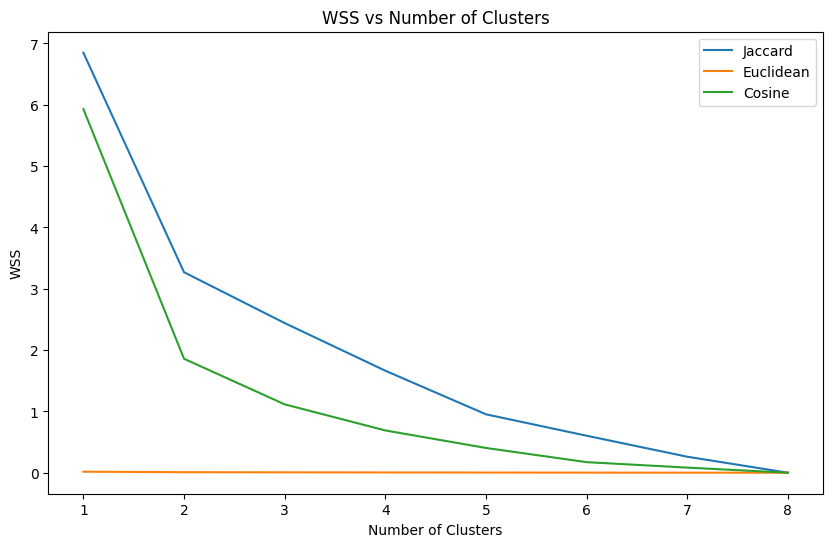

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_clustering(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)
    return kmeans

def calculate_wss(embeddings, max_clusters):
    wss = []
    for n in range(1, max_clusters+1):
        kmeans = kmeans_clustering(embeddings, n)
        wss.append(kmeans.inertia_)
    return wss

max_clusters = 8
wss_jaccard = calculate_wss(jaccard_sim_matrix, max_clusters)
wss_euclidean = calculate_wss(euclidean_dist_matrix, max_clusters)
wss_cosine = calculate_wss(cosine_sim_matrix, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), wss_jaccard, label='Jaccard')
plt.plot(range(1, max_clusters+1), wss_euclidean, label='Euclidean')
plt.plot(range(1, max_clusters+1), wss_cosine, label='Cosine')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('WSS vs Number of Clusters')
plt.legend()
plt.show()


Bag of words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True)

# Join the list of words in each sentence back into a string
sentences = [' '.join(sentence) for sentence in sentences]

X = vectorizer.fit_transform(sentences)

bow_matrix = X.toarray()
feature_names = vectorizer.get_feature_names_out()

print("Vocabulary:")
print(feature_names)

print("\nBag of Words (BoW) Representation:")
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    print(f"BoW Vector: {bow_matrix[i]}")
    print()

Vocabulary:
['barked' 'cat' 'chased' 'dancing' 'dog' 'eating' 'food' 'guitar' 'log'
 'man' 'mat' 'mouse' 'pizza' 'playing' 'sat' 'stranger' 'woman']

Bag of Words (BoW) Representation:
Sentence: the cat sat on the mat.
BoW Vector: [0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]

Sentence: the dog sat on the log.
BoW Vector: [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0]

Sentence: the cat chased the mouse.
BoW Vector: [0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

Sentence: the dog barked at the stranger.
BoW Vector: [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]

Sentence: a man is eating food.
BoW Vector: [0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]

Sentence: a woman is eating pizza.
BoW Vector: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]

Sentence: a man is playing guitar.
BoW Vector: [0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0]

Sentence: a woman is dancing.
BoW Vector: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]



continuous bag of words


In [ ]:
from collections import defaultdict
import numpy as np


def generate_cbow_examples(sentences, window_size=2):
    cbow_examples = []
    for sentence in sentences:
        words = sentence.lower().replace('.', '').split()
        for i, target in enumerate(words):
            start = max(0, i - window_size)
            end = min(len(words), i + window_size + 1)
            context = [words[j] for j in range(start, end) if j != i]
            cbow_examples.append((context, target))
    return cbow_examples



cbow_examples = generate_cbow_examples(sentences, window_size=2)


print("Continuous Bag of Words (CBOW) Examples:")
for context, target in cbow_examples:
    print(f"Context: {context}, Target: {target}")


Continuous Bag of Words (CBOW) Examples:
Context: ['cat', 'sat'], Target: the
Context: ['the', 'sat', 'on'], Target: cat
Context: ['the', 'cat', 'on', 'the'], Target: sat
Context: ['cat', 'sat', 'the', 'mat'], Target: on
Context: ['sat', 'on', 'mat'], Target: the
Context: ['on', 'the'], Target: mat
Context: ['dog', 'sat'], Target: the
Context: ['the', 'sat', 'on'], Target: dog
Context: ['the', 'dog', 'on', 'the'], Target: sat
Context: ['dog', 'sat', 'the', 'log'], Target: on
Context: ['sat', 'on', 'log'], Target: the
Context: ['on', 'the'], Target: log
Context: ['cat', 'chased'], Target: the
Context: ['the', 'chased', 'the'], Target: cat
Context: ['the', 'cat', 'the', 'mouse'], Target: chased
Context: ['cat', 'chased', 'mouse'], Target: the
Context: ['chased', 'the'], Target: mouse
Context: ['dog', 'barked'], Target: the
Context: ['the', 'barked', 'at'], Target: dog
Context: ['the', 'dog', 'at', 'the'], Target: barked
Context: ['dog', 'barked', 'the', 'stranger'], Target: at
Context: [

Elbow curve

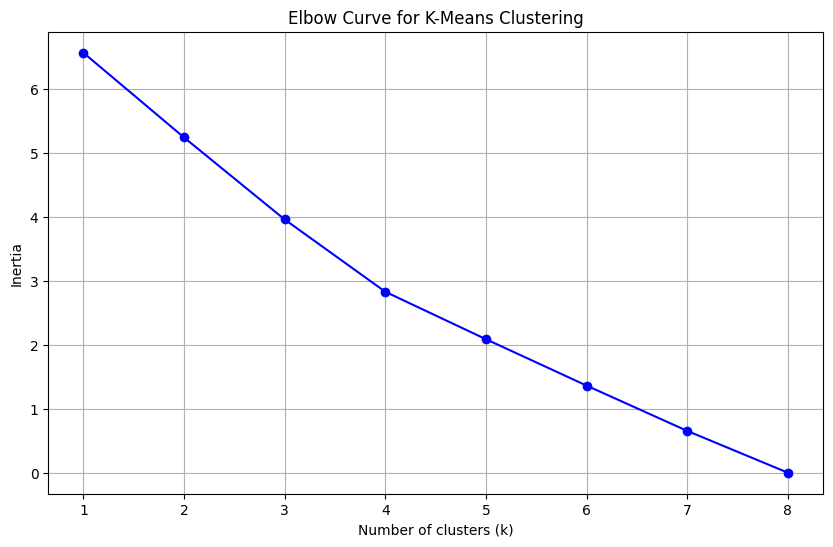

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#  sentences to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(sentences)

inertia = []


k_range = range(1, 9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#  elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

visualizing the similarity measures

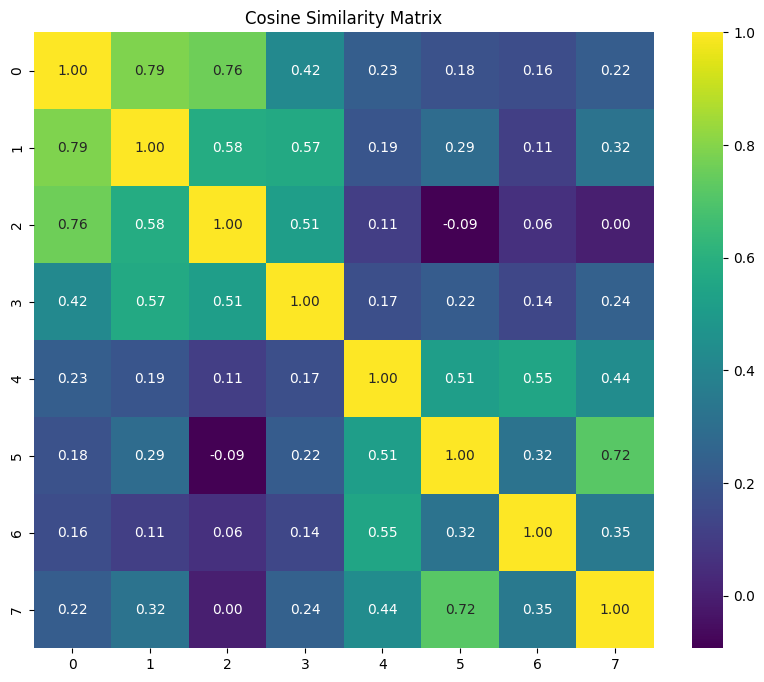

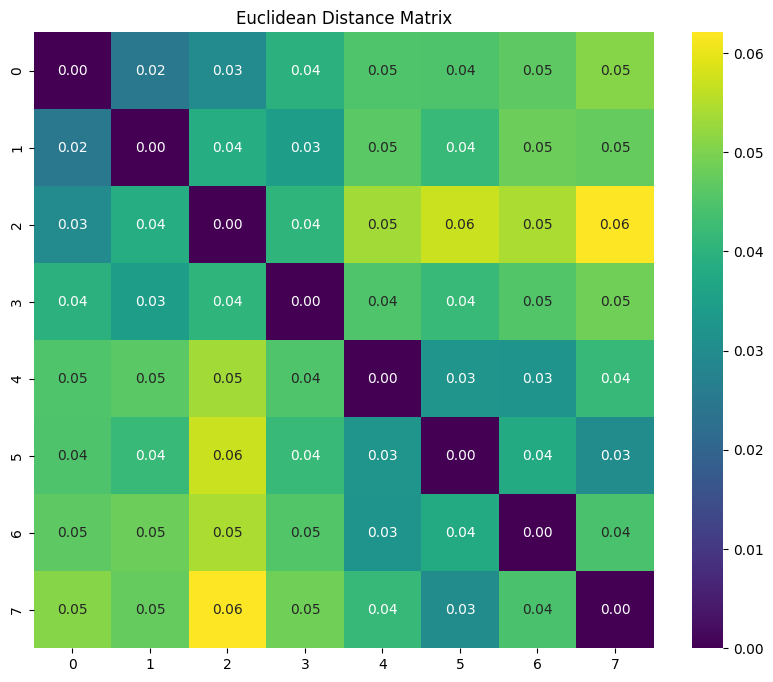

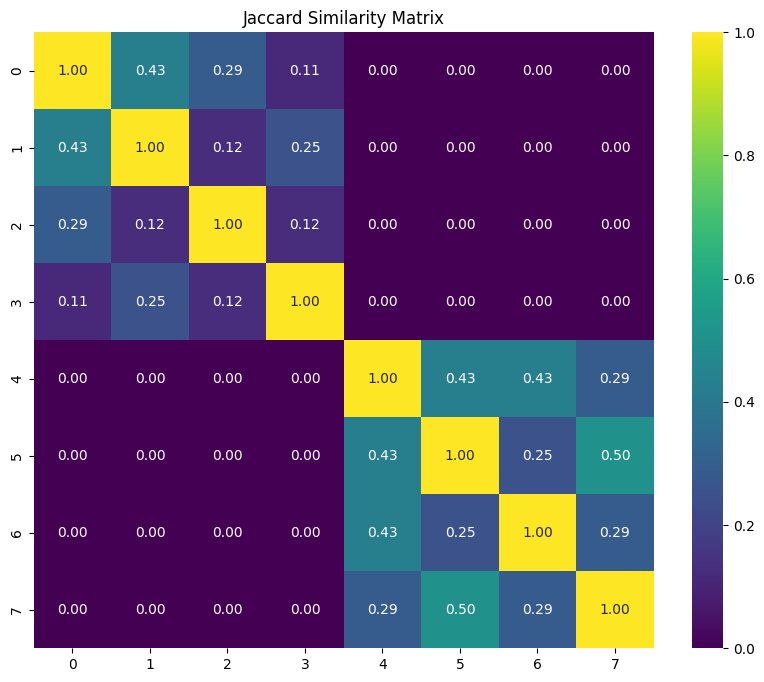

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Cosine Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cosine Similarity Matrix')
plt.show()

# Visualize Euclidean Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(euclidean_dist_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Euclidean Distance Matrix')
plt.show()

# Visualize Jaccard Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_sim_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Jaccard Similarity Matrix')
plt.show()
